In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


## Random Forest Modeling

In [3]:
X = DF[['meanPriceEach', 'totalOrder', 'orderType_1', 'orderType_2', 'orderType_3',
        'totalBundle', 'bundleType_1', 'bundleType_2', 'FY', 'Country']]
y = DF['customerType']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)

print(f'Train Data : {X_train.shape}, {y_train.shape}')
print(f'Test Data : {X_test.shape}, {y_test.shape}')

Train Data : (10506, 10), (10506,)
Test Data : (4503, 10), (4503,)


In [5]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=10,
                                  max_features=10,
                                  random_state=2045,
                                  n_jobs=-1)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=2045, verbose=0,
                       warm_start=False)

In [7]:
y_hat_rf = model_rf.predict(X_test)

print(y_hat_rf)

['Online' 'Offline' 'Offline' ... 'Offline' 'Online' 'Online']


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_hat_rf))

[[2220    7]
 [  40 2236]]


In [10]:
accuracy_score_rf = accuracy_score(y_test, y_hat_rf)

print(accuracy_score_rf)

0.9895625138796358


In [11]:
model_rf.feature_importances_

array([0.03579323, 0.72754329, 0.04130349, 0.02773218, 0.08065363,
       0.00365065, 0.00939165, 0.00744604, 0.00079706, 0.06568878])

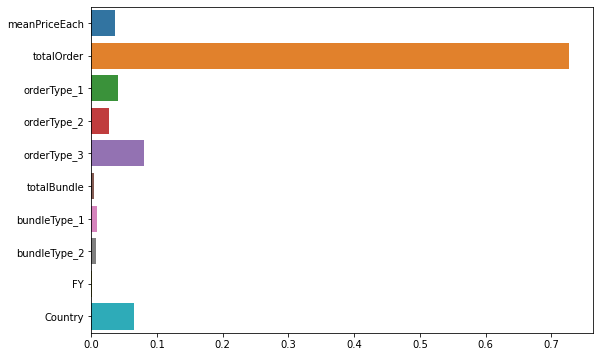

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 6))
sns.barplot(model_rf.feature_importances_,
            ['meanPriceEach', 'totalOrder', 'orderType_1', 'orderType_2', 'orderType_3',
             'totalBundle', 'bundleType_1', 'bundleType_2', 'FY', 'Country'])
plt.show()

## GridSearchCV

In [23]:
from sklearn.ensemble import RandomForestClassifier

model_rf2 = RandomForestClassifier()

In [32]:
params = {'n_estimators':[100, 300, 500],
          'max_features':[5, 10],
          'max_depth':[7, 15],
          'random_state':[2045]}

In [33]:
from sklearn.model_selection import GridSearchCV, KFold

grid_cv = GridSearchCV(model_rf2,
                       param_grid=params,
                       scoring='accuracy',
                       cv=KFold(n_splits=5,
                                random_state=2045),
                       refit=True,
                       n_jobs=-1)

In [34]:
from datetime import datetime

start_time = datetime.now()

grid_cv.fit(X_train, y_train)

end_time = datetime.now()
print(f'Elapsed Time : {end_time - start_time}')

Elapsed Time : 0:06:08.658995


In [35]:
grid_cv.best_score_

0.996573377454712

In [36]:
grid_cv.best_params_

{'max_depth': 15, 'max_features': 5, 'n_estimators': 500, 'random_state': 2045}

In [37]:
model_cv = grid_cv.best_estimator_

In [38]:
y_hat_cv = model_cv.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_hat_cv))

[[2220    7]
 [  24 2252]]


In [40]:
accuracy_score_cv = accuracy_score(y_test, y_hat_cv)

print(accuracy_score_cv)

0.9931157006440151


## Logistic Regression

In [41]:
X = DF[['meanPriceEach', 'totalOrder', 'orderType_1', 'orderType_2', 'orderType_3',
        'totalBundle', 'bundleType_1', 'bundleType_2', 'FY', 'Country']]
y = DF['customerType']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10506, 10) (10506,)
(4503, 10) (4503,)


In [44]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_hat_lr = model_lr.predict(X_test)

print(y_hat_lr)

['Online' 'Offline' 'Offline' ... 'Offline' 'Online' 'Online']


In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat_lr)

array([[1979,  248],
       [  60, 2216]])

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score_lr = accuracy_score(y_test, y_hat_lr)
print(accuracy_score_lr)

0.9316011547856984


## Decision Tree

In [48]:
X = DF[['totalBundle', 'totalOrder', 'meanPriceEach', 'Country',
        'orderType_1', 'orderType_2', 'orderType_3',
        'bundleType_1', 'bundleType_2', 'FY']]
y = DF['customerType']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10506, 10) (10506,)
(4503, 10) (4503,)


In [50]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=2045)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

In [51]:
y_hat_dt = model_dt.predict(X_test)

y_hat_dt

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat_dt)

array([[2203,   24],
       [  41, 2235]])

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score_dt = accuracy_score(y_test, y_hat_dt)
print(accuracy_score_dt)

0.9855651787697091


## 비교

In [54]:
print(f'LogisticRegression Accuracy : {accuracy_score_lr:.3f}')
print(f'DecisionTree Accuracy : {accuracy_score_dt:.3f}')
print(f'RandomForest Accuracy : {accuracy_score_rf:.3f}')

LogisticRegression Accuracy : 0.932
DecisionTree Accuracy : 0.986
RandomForest Accuracy : 0.990
